# ML Project

In [1]:
# import ML models

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
# import pandas and visualization libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## **Objective**

We want to predict how many passengers survived the Titanic crash.

## Import data

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/tylered/titanic-survival-prediction/main/train.csv')

In [5]:
df_test = pd.read_csv('https://raw.githubusercontent.com/tylered/titanic-survival-prediction/main/test.csv')

## Data View

In [6]:
df.shape

(891, 12)

Sibsip = Number of siblings and spouses aboard  
Parch = Number of parents/children aboard

In [7]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
df[df.Cabin.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [9]:
df[df.Age.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [10]:
df.Age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [11]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [12]:
df[df.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


## Data Cleaning

In [13]:
# encode binary categorical variable
df.Sex = df.Sex.apply(lambda x: 1 if x == 'female' else 0)

In [14]:
# remove name, ticket, passenger ID
df.drop(columns=['Name', 'PassengerId', 'Ticket'], axis=1, inplace=True)

In [15]:
# remove where embarked is null
df.dropna(subset=['Embarked', 'Age'], inplace=True)

In [16]:
# encode cabin
df.Cabin = df.Cabin.apply(lambda x: 0 if type(x) == str else 1)

## Data Visualization

Text(0.5, 0, 'Port')

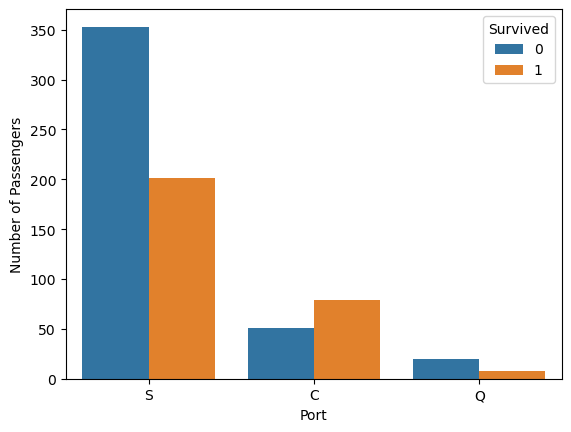

In [17]:
sns.countplot(df, x='Embarked', hue='Survived')
plt.ylabel('Number of Passengers')
plt.xlabel('Port')

Text(0, 0.5, 'Number of Passengers')

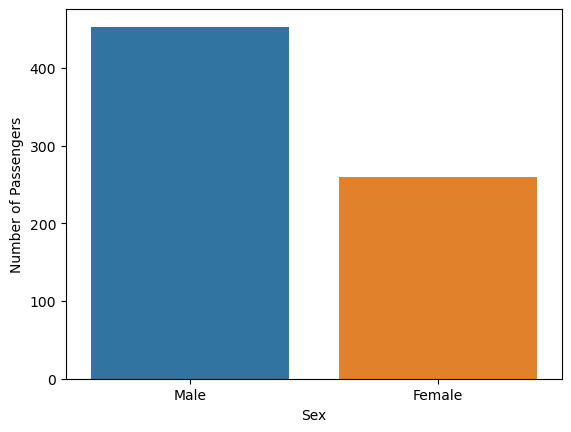

In [18]:
sx_plt = sns.countplot(df, x='Sex')
sx_plt.set_xticklabels(['Male', 'Female'])
plt.ylabel('Number of Passengers')

Text(0, 0.5, 'Number of Passengers')

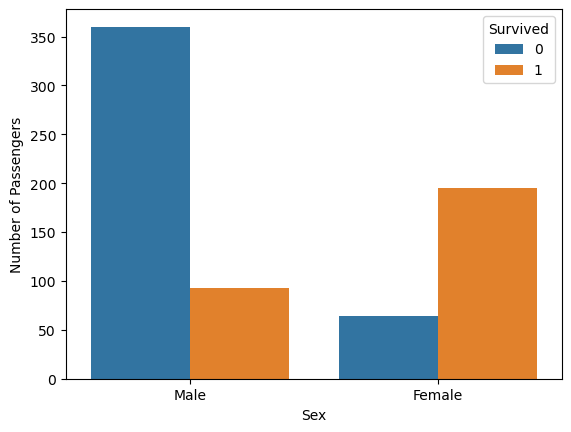

In [19]:
sx_surv = sns.countplot(df, x='Sex', hue='Survived')
sx_surv.set_xticklabels(['Male', 'Female'])
plt.ylabel('Number of Passengers')

Text(0, 0.5, 'Number of Passengers')

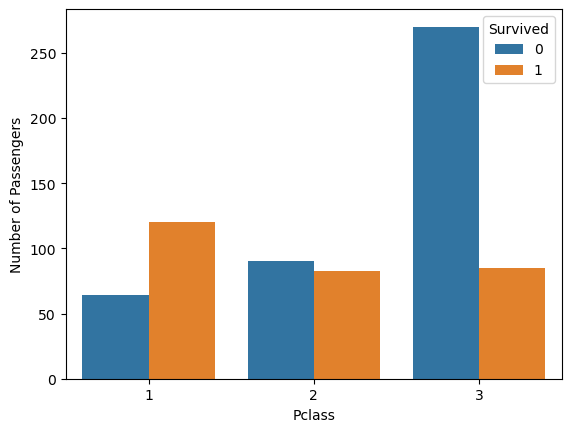

In [20]:
sns.countplot(df, x='Pclass', hue='Survived')
plt.ylabel('Number of Passengers')

Text(0, 0.5, 'Number of Passengers')

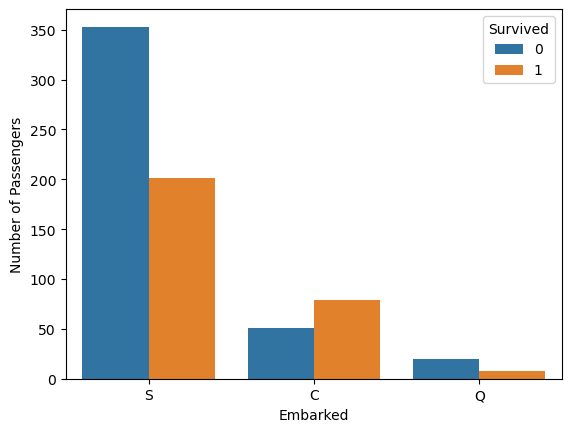

In [21]:
sns.countplot(df, x='Embarked', hue='Survived')
plt.ylabel('Number of Passengers')

Text(0, 0.5, 'Number of Passengers')

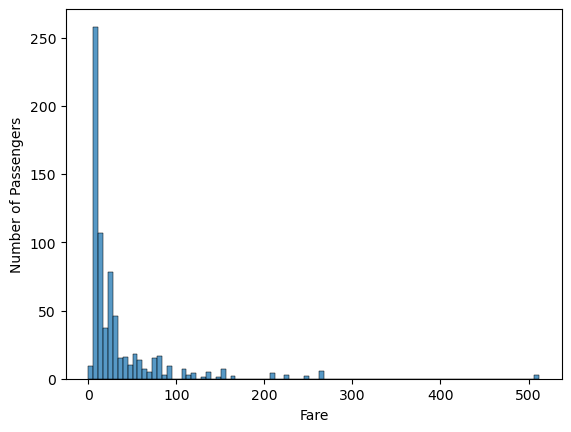

In [22]:
sns.histplot(df, x='Fare')
plt.ylabel('Number of Passengers')

Text(0, 0.5, 'Number of Passengers')

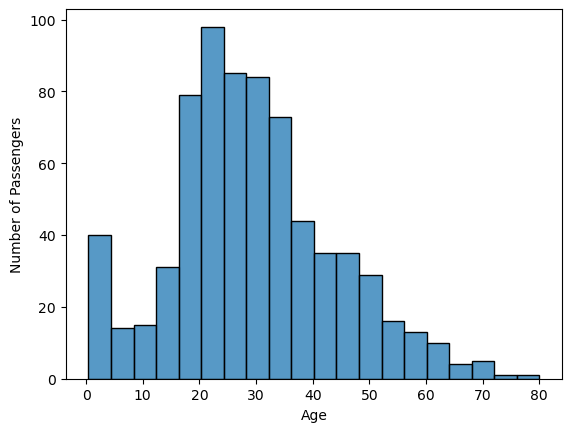

In [23]:
sns.histplot(df, x='Age')
plt.ylabel('Number of Passengers')

<Axes: xlabel='Pclass', ylabel='Fare'>

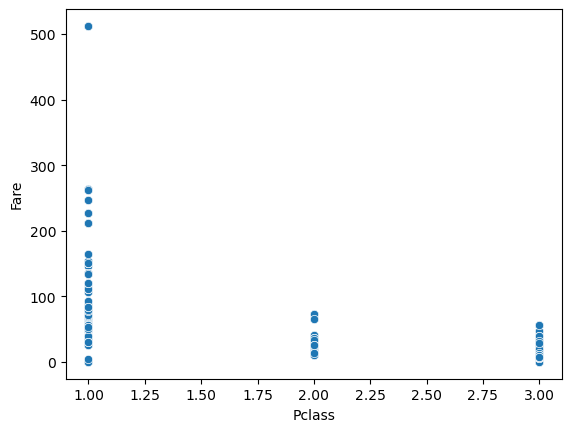

In [24]:
sns.scatterplot(df, x='Pclass', y='Fare')

/var/folders/_w/c37_2z5d7tzglvldbyrskvd00000gn/T/ipykernel_55373/202963147.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

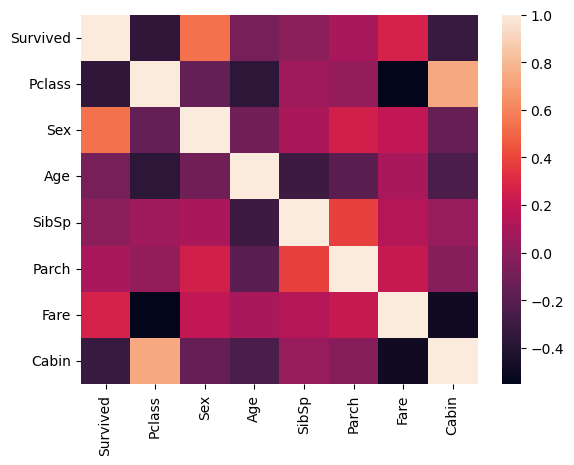

In [25]:
corr = df.corr()
sns.heatmap(corr)

In [26]:
corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
Survived,1.000000,-0.356462,0.536762,-0.082446,-0.015523,0.095265,0.266100,-0.320733
Pclass,-0.356462,1.000000,-0.150826,-0.365902,0.065187,0.023666,-0.552893,0.737721
Sex,0.536762,-0.150826,1.000000,-0.099037,0.106296,0.249543,0.182457,-0.143177
Age,-0.082446,-0.365902,-0.099037,1.000000,-0.307351,-0.187896,0.093143,-0.244981
SibSp,-0.015523,0.065187,0.106296,-0.307351,1.000000,0.383338,0.139860,0.031345
Parch,0.095265,0.023666,0.249543,-0.187896,0.383338,1.000000,0.206624,-0.029509
Fare,0.266100,-0.552893,0.182457,0.093143,0.139860,0.206624,1.000000,-0.490477
Cabin,-0.320733,0.737721,-0.143177,-0.244981,0.031345,-0.029509,-0.490477,1.000000


<Axes: >

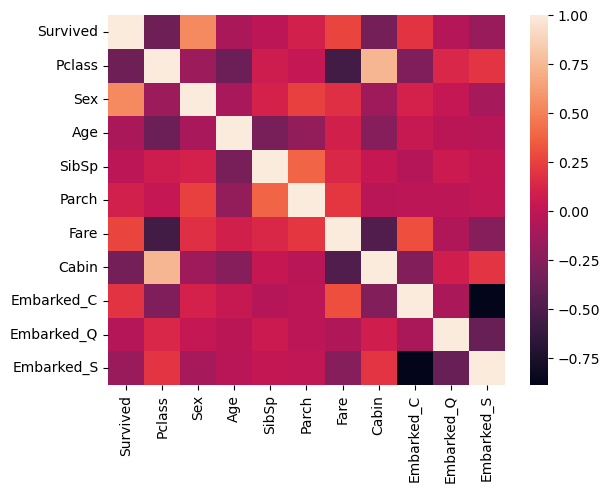

In [27]:
# correlation matrix with 

f2 = pd.get_dummies(df, columns=['Embarked'], dtype='int')
corr1 = f2.corr()
sns.heatmap(corr1)

In [28]:
corr1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.356462,0.536762,-0.082446,-0.015523,0.095265,0.266100,-0.320733,0.195673,-0.048966,-0.159015
Pclass,-0.356462,1.000000,-0.150826,-0.365902,0.065187,0.023666,-0.552893,0.737721,-0.279194,0.131989,0.197831
Sex,0.536762,-0.150826,1.000000,-0.099037,0.106296,0.249543,0.182457,-0.143177,0.103611,0.027256,-0.109078
Age,-0.082446,-0.365902,-0.099037,1.000000,-0.307351,-0.187896,0.093143,-0.244981,0.038268,-0.021693,-0.025431
SibSp,-0.015523,0.065187,0.106296,-0.307351,1.000000,0.383338,0.139860,0.031345,-0.046227,0.051331,0.018968
Parch,0.095265,0.023666,0.249543,-0.187896,0.383338,1.000000,0.206624,-0.029509,-0.009523,-0.009417,0.013259
Fare,0.266100,-0.552893,0.182457,0.093143,0.139860,0.206624,1.000000,-0.490477,0.301337,-0.062346,-0.250994
Cabin,-0.320733,0.737721,-0.143177,-0.244981,0.031345,-0.029509,-0.490477,1.000000,-0.262786,0.085929,0.204122
Embarked_C,0.195673,-0.279194,0.103611,0.038268,-0.046227,-0.009523,0.301337,-0.262786,1.000000,-0.095623,-0.884986
Embarked_Q,-0.048966,0.131989,0.027256,-0.021693,0.051331,-0.009417,-0.062346,0.085929,-0.095623,1.000000,-0.378859


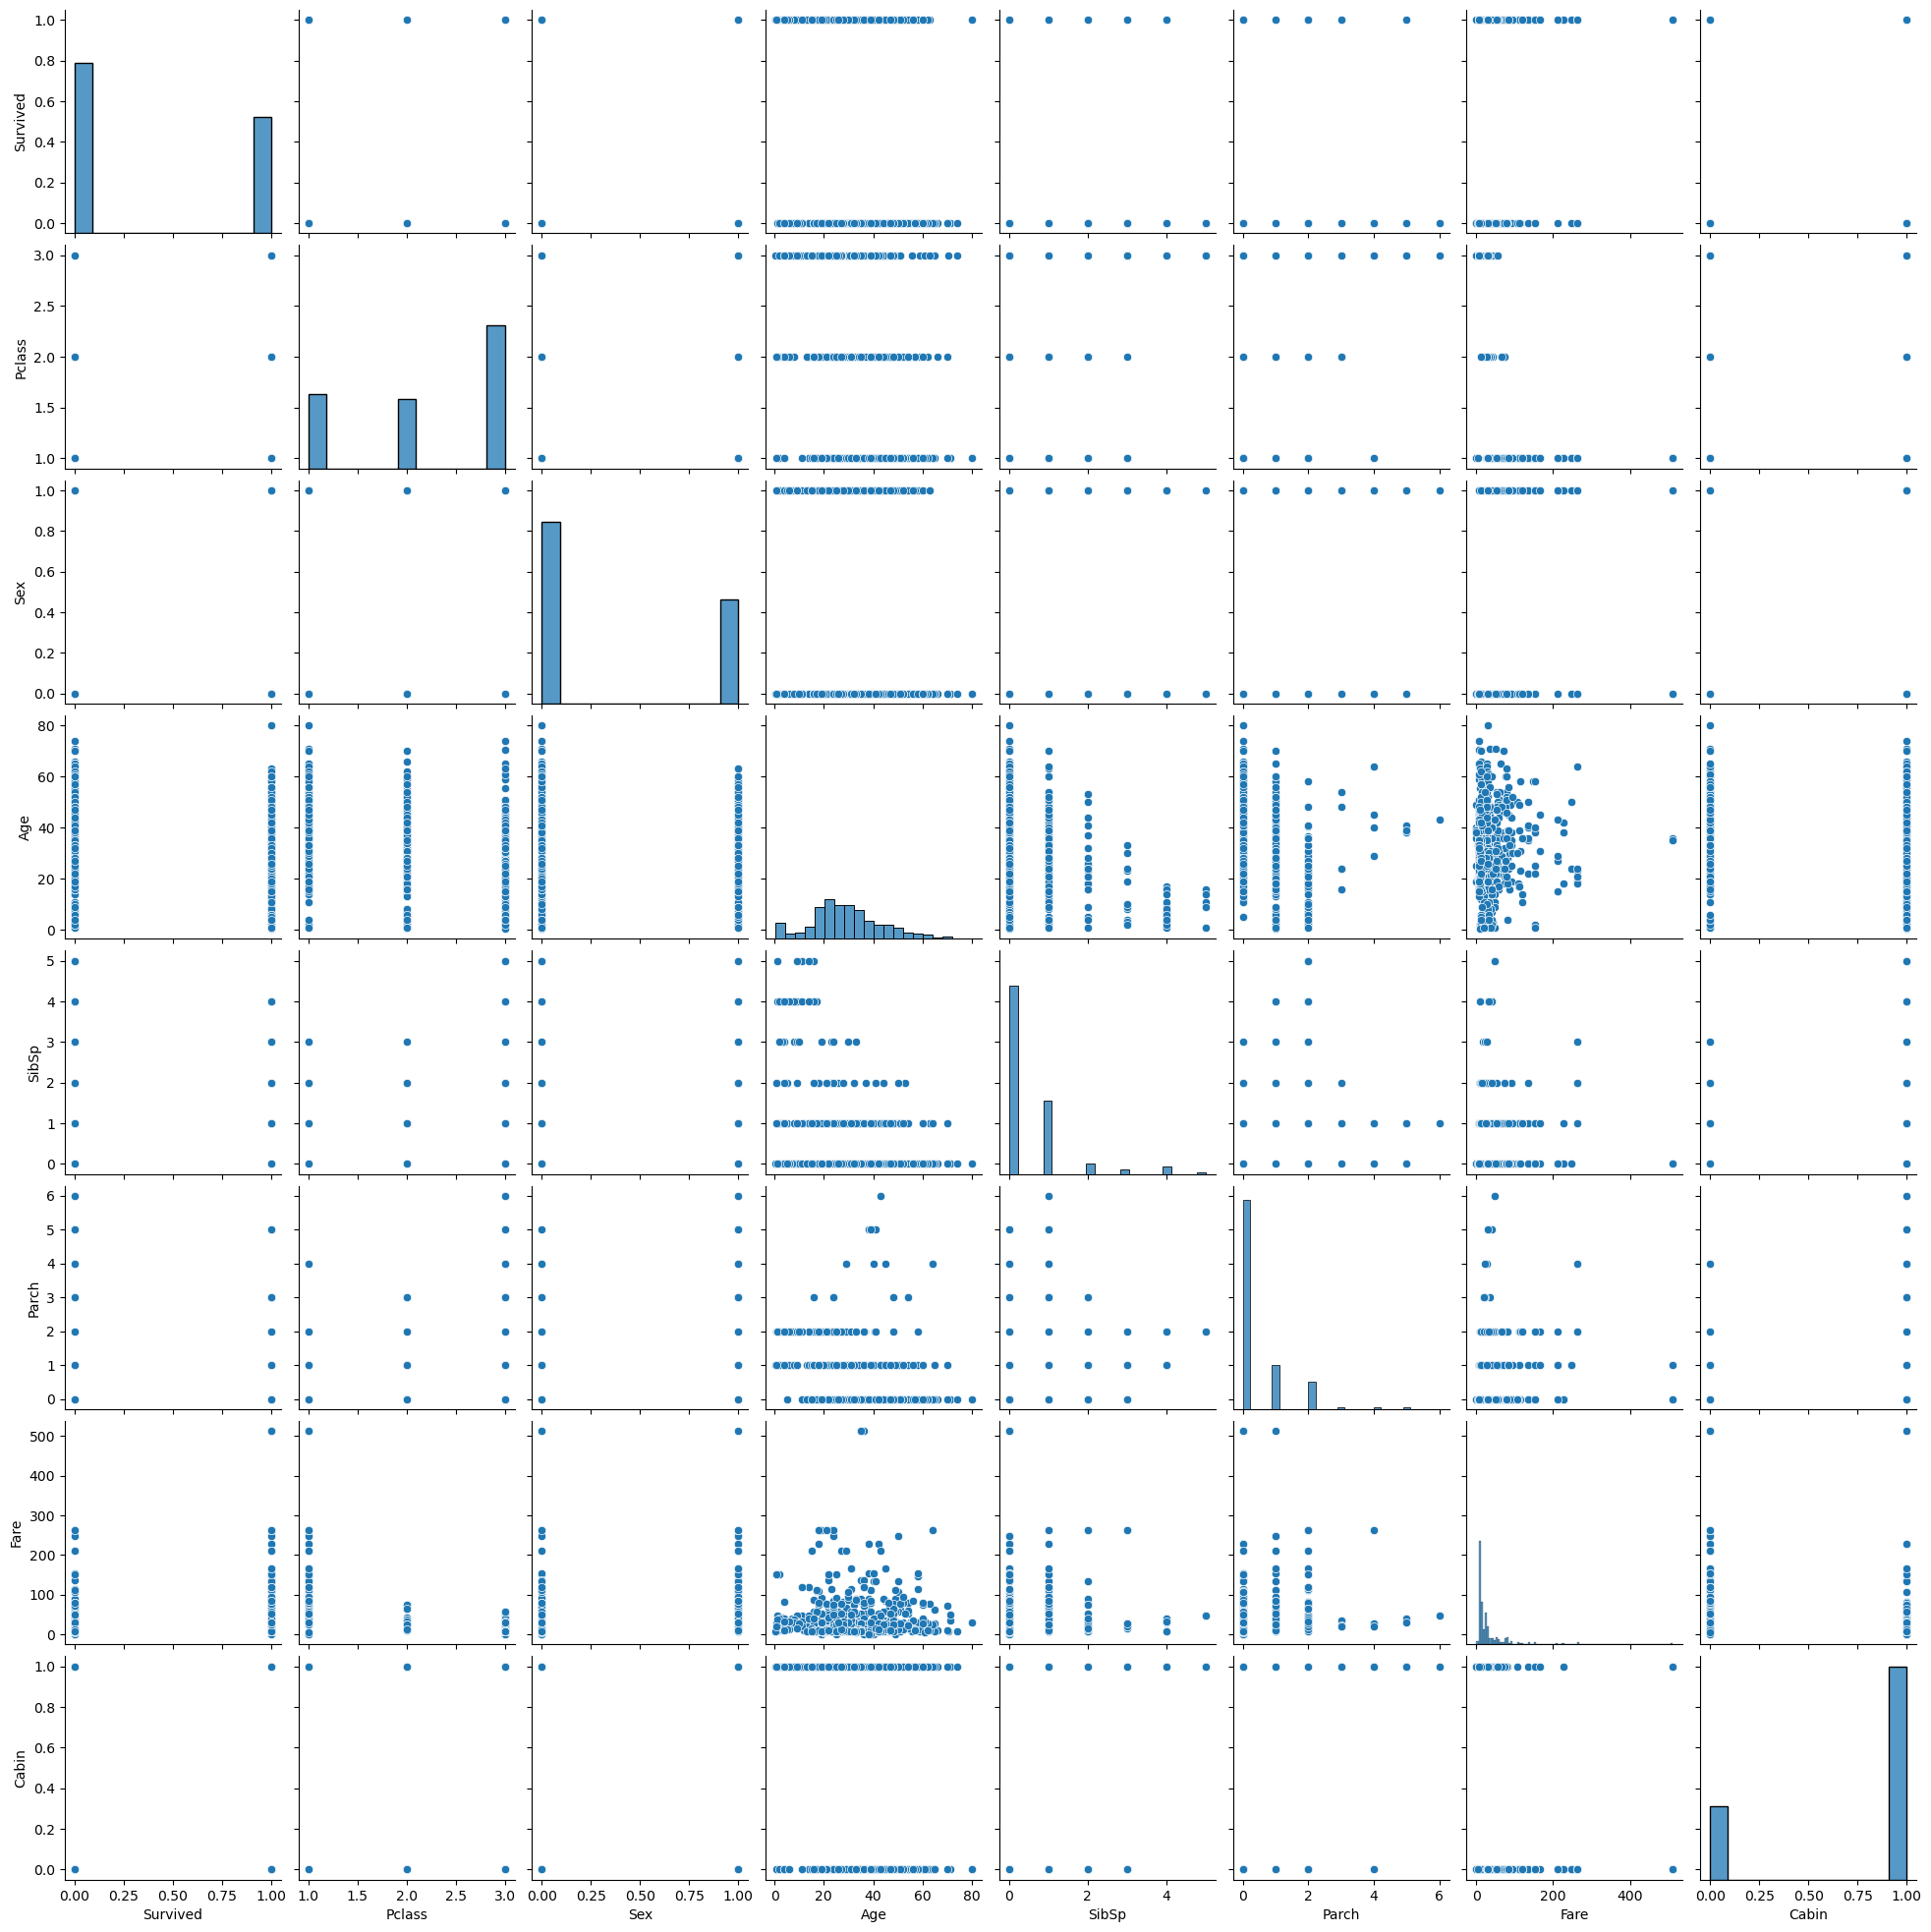

In [29]:
sns.pairplot(data=df)

## ML Modeling & Predictions

###  Data Preparation for Models for Training Data

In [30]:
# ML preparation

df_ml = df.dropna(subset=['Age'])
target_train = df_ml['Survived']
features_train = df_ml.iloc[:, 1:]

In [31]:
# encode embarked column

features_train = pd.get_dummies(features_train, columns=['Embarked'], dtype='int')

In [32]:
features_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,26.0,0,0,7.9250,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,3,0,35.0,0,0,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
885,3,1,39.0,0,5,29.1250,1,0,1,0
886,2,0,27.0,0,0,13.0000,1,0,0,1
887,1,1,19.0,0,0,30.0000,0,0,0,1
889,1,0,26.0,0,0,30.0000,0,1,0,0


###  Data Preparation for Models for Test Data

In [33]:
# prepare test dataset
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [34]:
# encode sex
df_test['Sex'] = df_test.Sex.apply(lambda x: 1 if x == 'female' else 0)

# remove name and ticket
df_test.drop(columns=['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

# remove where embarked and age are null
df_test.dropna(subset=['Embarked', 'Age'], inplace=True)

# encode cabin
df_test.Cabin = df_test.Cabin.apply(lambda x: 0 if type(x) == str else 1)

In [35]:
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,0,34.5,0,0,7.8292,1,Q
1,3,1,47.0,1,0,7.0000,1,S
2,2,0,62.0,0,0,9.6875,1,Q
3,3,0,27.0,0,0,8.6625,1,S
4,3,1,22.0,1,1,12.2875,1,S
...,...,...,...,...,...,...,...,...
409,3,1,3.0,1,1,13.7750,1,S
411,1,1,37.0,1,0,90.0000,0,Q
412,3,1,28.0,0,0,7.7750,1,S
414,1,1,39.0,0,0,108.9000,0,C


In [36]:
# features for testing
features_test = df_test

In [37]:
# encode embarked
features_test = pd.get_dummies(features_test, columns=['Embarked'], dtype='int')

In [38]:
# drop null values fare 
features_test.dropna(subset=['Fare'], inplace=True)

### Decision Tree

In [39]:
tree = DecisionTreeClassifier()
params = {'criterion': ['gini', 'entropy', 'log_loss'], 'max_features': ['auto', 'sqrt', 'log2']}
tree_cv = GridSearchCV(tree, params)

In [40]:
# fit model
tree_cv.fit(features_train, target_train)

/Users/tyduuu/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/tyduuu/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/tyduuu/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/tyduuu/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_fea

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [41]:
tree_cv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_features='sqrt')

In [42]:
# estimate how many people survived
yhat = tree_cv.predict(features_test)
yhat.sum()/len(yhat) 

0.39274924471299094

### Random Forest

In [43]:
rf = RandomForestClassifier()
params = {'criterion': ['gini', 'entropy', 'log_loss'], 'max_features': ['sqrt', 'log2', None]}
rf_cv = GridSearchCV(rf, params)

In [44]:
rf_cv.fit(features_train, target_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2', None]})

In [45]:
rf_cv.best_estimator_

RandomForestClassifier(criterion='entropy', max_features=None)

In [46]:
# estimate how many survived

yhat = rf_cv.predict(features_test)
yhat.sum()/len(yhat)

0.4259818731117825

### SVM

In [47]:
svc = SVC()
params = {'kernel' : ['rbf', 'sigmoid'], 'degree': [3, 4, 5], 'gamma': ['scale', 'auto'], 'C': [1, 5, 10, 100]}
svc_cv = GridSearchCV(svc, params)

In [48]:
svc_cv.fit(features_train, target_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 5, 10, 100], 'degree': [3, 4, 5],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'sigmoid']})

In [49]:
svc_cv.best_estimator_

SVC(C=100)

In [50]:
# estimate how many people survived
yhat = svc_cv.predict(features_test)
yhat.sum()/len(yhat)

0.44108761329305135

## Logistic Regression

In [51]:
lr = LogisticRegression()
params = {'penalty': ['l1', 'l2', 'elasticnet'],  'C': [1.0, 5.0, 10.0, 100.0], 'solver': ['lbfgs', 'liblinear']}
lr_cv = GridSearchCV(lr, params)
lr_cv.fit(features_train, target_train)

/Users/tyduuu/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tyduuu/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

/Users/tyduuu/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/tyduuu/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tyduuu/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/tyduuu/anaconda3/lib/python3.

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1.0, 5.0, 10.0, 100.0],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear']})

In [52]:
lr_cv.best_estimator_

LogisticRegression(solver='liblinear')

In [53]:
# estimated percentage of people who survived
yhat = lr_cv.predict(features_test)
yhat.sum()/len(yhat)

0.40181268882175225